# AS5001 (SUPA-AAA) Advanced (Astronomical) Data Analysis : Homework Set 2 (due Mon 24 Oct 2022)                                               


In [1]:
# Enable inline plotting in notebook
%matplotlib inline
# Populate namespace with numerical python function library and matplotlib plotting library.
import numpy as np
import matplotlib.pyplot as plt

### Problem 2.1 Poisson Random Variables [20]

Assume $X_i$ for $i=1,2,...N$ are independent Poisson random variables 
with mean value $\left< X \right> = R$.  These might be time-binned counts
from a light curve, or wavelength-binned counts from the continuum
of a spectrum, with $R$ being the mean count rate.

(a) Give an expression for and make a plot of the probability
that $X_3 = 1$ as a function of the count rate $R$.
Evaluate $P(\,X_3 > 0\, |\, R = 0.5\, )$. [10]



(b) Derive an expression for the maximum likelihood 
estimator for $R$, 
denoted $R_{\rm ML}$, in terms of the $X_i$.
Similarly, evaluate the expected value and the variance of 
$R_{\rm ML}$. 
State whether or not $R_{\rm ML}$ is an unbiased estimator
for $R$, and whether or not it is a minimum variance
statistic, and briefly justify your conclusions. [10] 


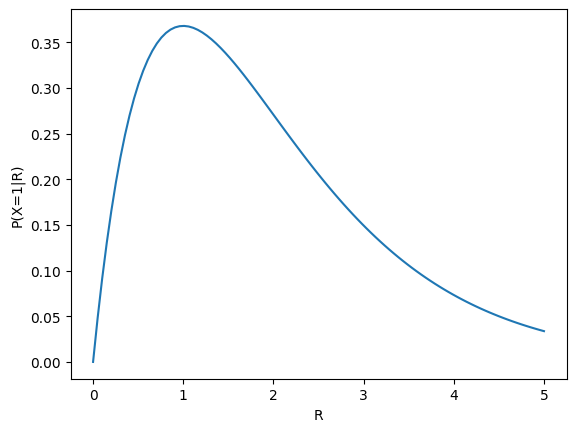

In [2]:
# (a)
R = np.linspace(0, 5, 100)
P = R*np.exp(-R)
plt.plot(R, P)
plt.xlabel("R")
plt.ylabel("P(X=1|R)")
plt.show()

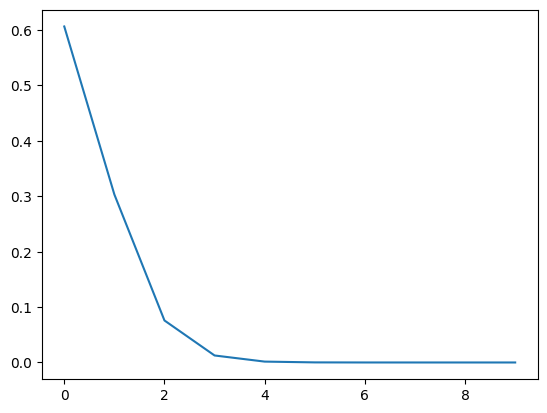

In [3]:
x = np.arange(0, 10, 1)
mu = 0.5
poisson = [mu**n * np.exp(-mu) / np.math.factorial(n) for n in x]
plt.plot(x, poisson)

(b) woe p48
R_ml is unbiased estimator

### Problem 2.2 Continuum and Emission Line [35]

Given $N=3$ fluxes measured from a spectrum as follows :

$\left(F_1,F_2,F_3\right)=\left( 110\pm10, 160\pm20, 90\pm10\right)$
at
$\left(\lambda_1,\lambda_2,\lambda_3\right)=\left(80,105,120\right)$ , 

fit the function (continuum plus emission line)
$$
F(\lambda) = C + A\, G(\lambda), \hspace{2cm}
G(\lambda) = 
\frac{1}{\sqrt{2\pi}\Delta} \exp{ \left\{ -\frac{1}{2}
\left(\frac{\lambda-\lambda_0}{\Delta}\right)^2 \right\} } ,
$$
where $\lambda_0 = 100$ and $\Delta=5$ (wavelength of spectral
line, resolution of spectrograph) are known (calibrated nuisance parameters),
and the parameters of interest in the fit are
$C$ (continuum flux density) and $A$ (integrated emission-line flux) .

(a) Derive general expressions for the maximum likelihood estimators $C_{\rm
ML}$ and $A_{\rm ML}$, and for their variances, in terms of the data $F_i$, 
error bars $\sigma_i$ and pattern $G_i\equiv G(\lambda_i)$. Evaluate these 
for the specific dataset above to
determine the best-fit parameters and their 1-parameter 1-$\sigma$ 
confidence limits.  Plot
the data points, error bars, and best-fit model as functions of $\lambda$. 
Offset each parameter by its uncertainty, $\pm\sigma$, and plot the 4 corresponding models
(on the same plot) for comparison with the data. [10]

(b) Make a second plot showing $\chi^2$ contours in the $C$ vs $A$ plane
corresponding to the 2-parameter
1-$\sigma$, 2-$\sigma$, and 3-$\sigma$ confidence regions
(e.g. using PGCONT). Show also the $\Delta\chi^2=1$ contour.
Conclude from the shape of the contours whether $C$ and $A$ are 
independent, or positively or negatively correlated.
Draw lines on the plot identifying the
1-parameter 1-$\sigma$ confidence intervals (e.g. using PGMOVE and PGDRAW),
and comment on their relation to the $\Delta\chi^2=1$ contour. [10]

(c) Give a general expression for the Hessian matrix for this fit, 
and for its inverse.  Evaluate the inverse of the Hessian matrix to 
obtain the parameter variances and covariances.
Evaluate the correlation coefficient between $C_{\rm ML}$ and $A_{\rm ML}$.
Does this result confirm your conclusion from (b)?  [10]

(d) Construct an orthogonal basis for this fit, and
plot the two basis functions versus $\lambda$.
Plot $\chi^2$ contours using the orthogonal basis, and compare with your
results in (b). [5]



#### Ans
(a) derivation see separate pdf

Evaluate these 
for the specific dataset above to
determine the best-fit parameters and their 1-parameter 1-$\sigma$ 
confidence limits:

In [29]:
F = np.array([110., 160., 90.])
sig = np.array([10., 20., 10.])
lam = np.array([80., 105., 120.])
lam0 = 100.
dlam = 5.
G = np.exp(-0.5 * ((lam - lam0)/dlam)**2) / (np.sqrt(2*np.pi)*dlam)
guess = [100., 100.]

# iterate to get C_ml and A_ml
for i in range(100):
    if i==0:
        C_last, A_last = guess[0], guess[1]
    else:
        C_last, A_last = C_ml, A_ml
    C_ml = np.sum((F - A_last*G) / sig**2) / np.sum(1/sig**2)
    A_ml = np.sum(((F-C_last) * G) / sig**2) / np.sum(G**2/sig**2)
var_C_ml = 1 / np.sum(1/sig**2)
var_A_ml = 1 / np.sum((G**2/sig**2))
sig_C_ml = np.sqrt(var_C_ml)
sig_A_ml = np.sqrt(var_A_ml)
print(f"C_ml: {C_ml:.4f}, A_ml:{A_ml:.4f}")
print(f"1-sig for C_ml: {sig_C_ml:.4f}., 1-sig for A_ml: {sig_A_ml:.4f}")

C_ml: 99.9668, A_ml:1240.5055
1-sig for C_ml: 6.6667., 1-sig for A_ml: 413.2726


Plot the data points, error bars, and best-fit model as functions of $\lambda$; Offset each parameter by its uncertainty, $\pm\sigma$, and plot the 4 corresponding models
(on the same plot) for comparison with the data:

Text(0, 0.5, 'flux')

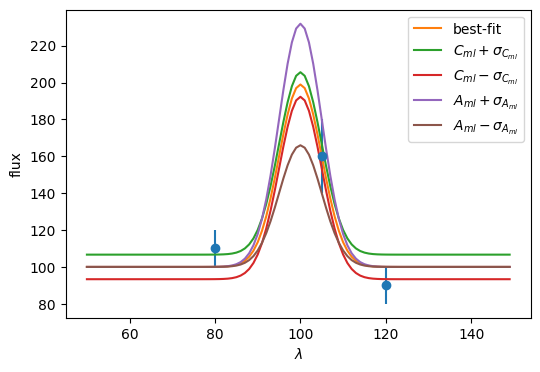

In [40]:
plt.figure(figsize=(6,4))
plt.errorbar(lam, F, yerr=sig, fmt="o")
def model(x, C, A):
    G = np.exp(-0.5 * ((x - lam0)/dlam)**2) / (np.sqrt(2*np.pi)*dlam)
    return C + A * G
x = np.arange(50, 150, 1)
plt.plot(x, model(x, C_ml, A_ml), label="best-fit")
plt.plot(x, model(x, C_ml+sig_C_ml, A_ml), label="$C_{ml}+\sigma_{C_{ml}}$")
plt.plot(x, model(x, C_ml-sig_C_ml, A_ml), label="$C_{ml}-\sigma_{C_{ml}}$")
plt.plot(x, model(x, C_ml, A_ml+sig_A_ml), label="$A_{ml}+\sigma_{A_{ml}}$")
plt.plot(x, model(x, C_ml, A_ml-sig_A_ml), label="$A_{ml}-\sigma_{A_{ml}}$")
plt.legend()
plt.xlabel("$\lambda$")
plt.ylabel("flux")

Make a second plot showing $\chi^2$ contours in the $C$ vs $A$ plane
corresponding to the 2-parameter
1-$\sigma$, 2-$\sigma$, and 3-$\sigma$ confidence regions; Show also the $\Delta\chi^2=1$ contour; Draw lines on the plot identifying the
1-parameter 1-$\sigma$ confidence intervals:

In [57]:
chi_sq = np.zeros((140, 3000))
for C in range(140):
    for A in range(3000):
        chi_sq[C, A] = np.sum((F-model(lam, C, A))**2/sig**2)
chi_sq_min = chi_sq.min()

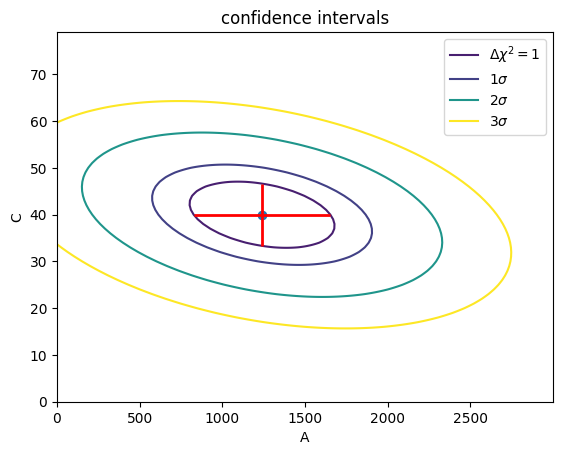

In [107]:
from matplotlib import lines
plt.scatter(A_ml, C_ml-60)
cs = plt.contour(chi_sq[60:, :], levels=[chi_sq_min, chi_sq_min+1.0, chi_sq_min+2.30, chi_sq_min+6.17, chi_sq_min+11.80])
labels = ['$\Delta\chi^2=1$', '$1\sigma$', '$2\sigma$', '$3\sigma$']
proxy = [lines.Line2D([0,0],[0,1], color=pc.get_edgecolor()[0]) for pc in cs.collections[1:]]
plt.legend(proxy, labels)
plt.xlabel("A")
plt.ylabel("C")
plt.title("confidence intervals")
plt.hlines(y=C_ml-60, xmin=A_ml-sig_A_ml, xmax=A_ml+sig_A_ml, linewidth=2, color='r')
plt.vlines(x=A_ml, ymin=C_ml-sig_C_ml-60, ymax=C_ml+sig_C_ml-60, linewidth=2, color='r')
plt.show()

C and A are not independent. They are negatively correlated. The 1-parameter 1-$\sigma$ confidence intervals are just the cross section of the $\Delta\chi^2$ contour at the corresponding value of the other parameter.

### Problem 2.3 Mass of Black Hole in V404 Cygni [45]

The X-ray nova V404~Cyg is a binary system suspected to harbour a black hole.
The K0~IV companion star and black hole candidate orbit about their
common centre of mass with a period $P = 6.4714\pm0.0001$ days.
Radial velocity measurements of the companion star's absorption lines
yield a sinusoidal radial velocity curve with semi-amplitude 
$$
K_C = 208.5\pm0.7~{\rm km~s}^{-1}.
$$
The companion star fills its Roche lobe and co-rotates with the
binary orbit.
Its spectral lines are thereby rotationally broadened by
$$
V_{\rm rot}\sin{i} = 38.8\pm1.1~{\rm km~s}^{-1}.
$$
The inclination $i$ (angle between the line of sight and the
vector normal to the binary orbit plane) is not well determined, but
the absence of eclipses
and presence of 0.2~mag ellipsoidal variations
from the companion star imply
$$
50^\circ < i < 80^\circ.
$$

Use a Monte-Carlo simulation to investigate posterior
probability distributions for the masses $M_X$ of the black hole candidate
(X-ray source), and $M_C$ of the companion star.
Use the above observational constraints on $P$, $K_C$, $(V_{\rm rot}\sin{i})$,
and $i$, and the following binary star formulae :
$$
\left( \frac{2\pi }{P} \right)^2 = \frac{G\,(M_X+M_C)}{a^3}
\hspace{2cm}
(K_X+K_C) = \frac{2\pi\, a\, \sin{i}}{P}
$$ $$
\frac{K_X}{K_C} = \frac{M_C}{M_X} = q
\hspace{2cm}
(V_{\rm rot}\sin{i}) = 0.462\, K_C\, q^{1/3} \left( 1 + q  \right)^{2/3}
$$
Here $a$ is the separation between the two stars, and $q=M_C/M_X$ is the mass ratio.

(a) Use the above formulae to solve for the masses 
$M_X$ and $M_C$ in terms of thhree observed quantities $P$, $K_C$,
$(V_{\rm rot}\sin{i})$, and the inclination $i$.
To do this, first derive the mass function
$$
F_X \equiv
\frac{M_X\, (\sin{i})^3}{(1+q)^2} = \frac{K^3_C\, P}{2 \pi\, G}.
$$
Why is $F_X$ a lower limit on $M_X$?
Next note that $K_C$ and $(V_{\rm rot}\sin{i})$ together determine $q$,
and use this to eliminate $q$ from the mass function, so that you can
calculate $M_X$ and $M_C$ from the three observed quantities 
$P$, $K_C$, and $(V_{\rm rot}\,\sin{i})$, plus $\sin{i}$.  [15] 

(b) Use your RANG Gaussian random number subroutine
to generate mock datasets that sample the observed distributions
of $P$, $K_C$ and $(V_{\rm rot}\sin{i})$.
Use a distribution uniform in $\cos{i}$ to sample the unknown orbit 
orientation
at random between the observational upper and lower limits on $i$.
For each mock dataset, use the expressions you derived in (a) to 
calculate the mass function, and the corresponding values of $M_X$ and $M_C$.
Express masses in units of the Sun's mass $M_\odot$.
Do this for a large number of mock datasets (trials), and
make histogram plots (e.g. using PGHIST) of the resulting posterior mass
distributions.
Average over the trials to estimate
mean values and standard deviations for
$M_X$ and $M_C$.
Evaluate also the 1-parameter 1-$\sigma$ confidence intervals,
noting that these are asymmetric because the posterior distributions
are skewed, and compare these with the standard deviations.
Evaluate the probability that $M_X > 3\,M_\odot$, and use the result to 
answer the question "Is there a black hole in this system"?  [15]


(c)
Plot the joint probability distribution of $M_X$ and $M_C$.
One way to do this is to use your Monte Carlo trials, and just
"plot the dots" for each trial value of $M_C$ and $M_X$.
Another way is to accumulate a large number of trial values into a
grid spanning some appropriate range in $M_C$ vs $M_X$,
and then plot the array as contours (e.g. using PGCONT) and/or a greyscale 
image (e.g. using PGGRAY).
Select the appropriate contour levels, and outline on your plot
the 2-parameter 1-$\sigma$
and 2-$\sigma$ confidence regions.
Plot also the 1-parameter confidence intervals found in (b).
Are $M_X$ and $M_C$ independent?
Evaluate the correlation coefficient between $M_X$ and $M_C$.  [15]

